In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/30000-spotify-songs/readme.md
/kaggle/input/30000-spotify-songs/spotify_songs.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
music = pd.read_csv("/kaggle/input/30000-spotify-songs/spotify_songs.csv")
music.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
music.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [5]:
# Checking for missing values in each column
missing_values = music.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index
print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: Index(['track_name', 'track_artist', 'track_album_name'], dtype='object')


In [6]:
# Count missing values in each column
missing_values = music.isnull().sum()

# Calculate percentages of missing values
missing_percentages = (missing_values / len(music)) * 100

# Created a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})

# Display the DataFrame
print(missing_info)

                          Missing Values  Percentage
track_id                               0    0.000000
track_name                             5    0.015229
track_artist                           5    0.015229
track_popularity                       0    0.000000
track_album_id                         0    0.000000
track_album_name                       5    0.015229
track_album_release_date               0    0.000000
playlist_name                          0    0.000000
playlist_id                            0    0.000000
playlist_genre                         0    0.000000
playlist_subgenre                      0    0.000000
danceability                           0    0.000000
energy                                 0    0.000000
key                                    0    0.000000
loudness                               0    0.000000
mode                                   0    0.000000
speechiness                            0    0.000000
acousticness                           0    0.

* Not bad. I will remove missing

In [7]:
music.shape

(32833, 23)

In [8]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [9]:
music.duplicated().sum()

0

In [10]:
music = music.dropna()

In [11]:
# Drop duplicates
music = music.drop_duplicates()

# Handle outliers using z-score
from scipy.stats import zscore
z_scores = zscore(music[['danceability', 'energy']])
music_no_outliers = music[(z_scores < 3).all(axis=1)]

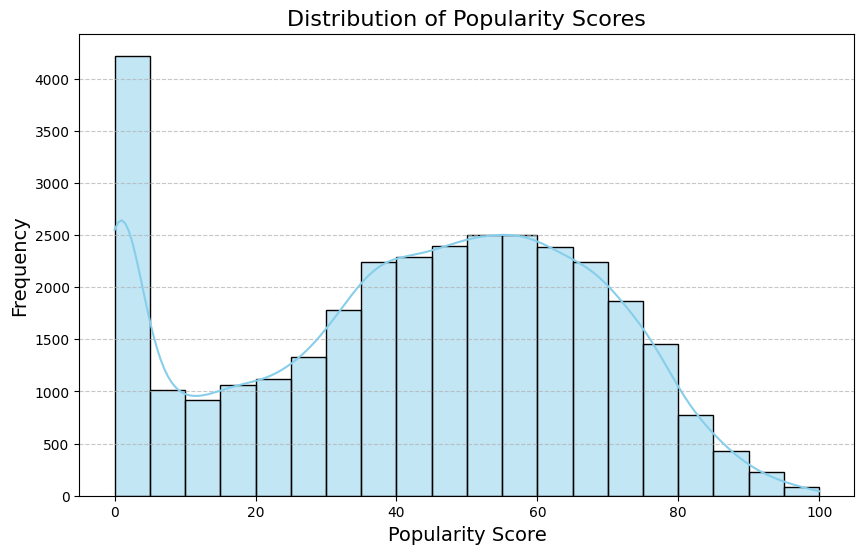

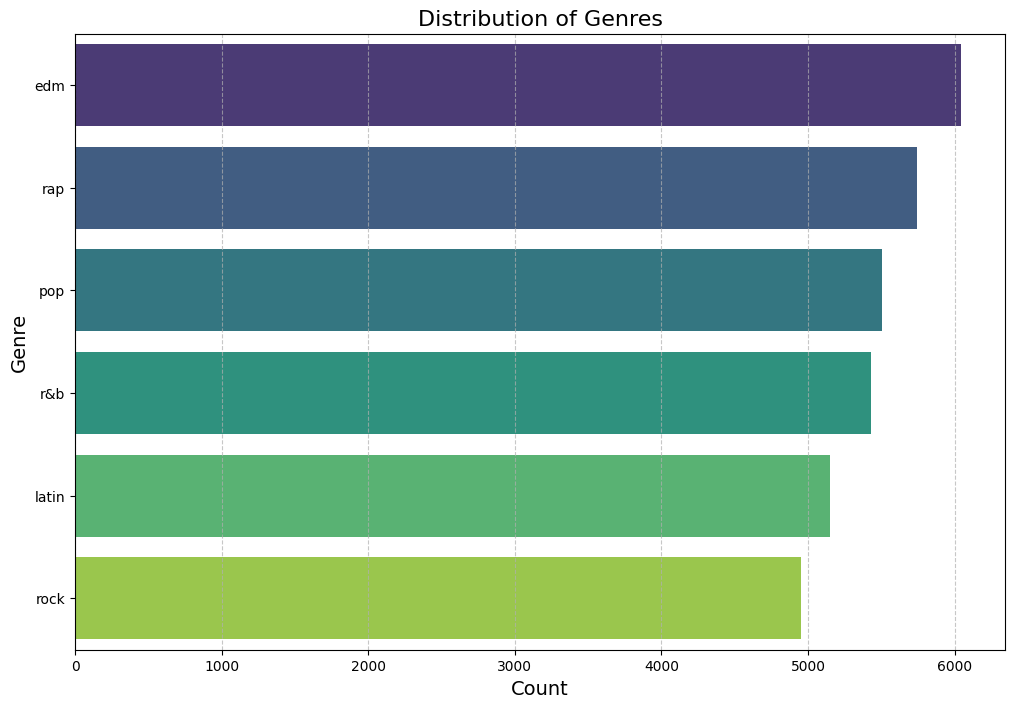

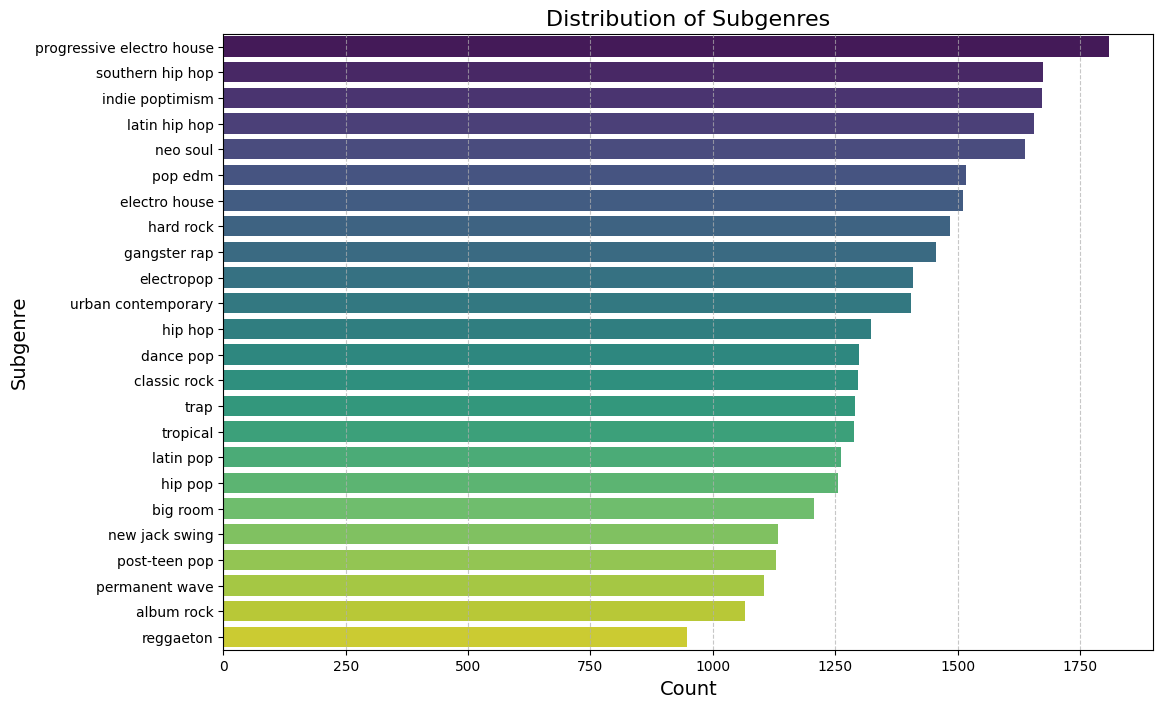

In [12]:
#The distribution of popularity scores using histograms
plt.figure(figsize=(10, 6))
sns.histplot(music['track_popularity'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity Scores', fontsize=16)
plt.xlabel('Popularity Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyzed the distribution of genres and subgenres
plt.figure(figsize=(12, 8))
sns.countplot(y='playlist_genre', data=music, order=music['playlist_genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(y='playlist_subgenre', data=music, order=music['playlist_subgenre'].value_counts().index, palette='viridis')
plt.title('Distribution of Subgenres', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Subgenre', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [13]:
music.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [14]:
music['track_album_release_date'].head()

0    2019-06-14
1    2019-12-13
2    2019-07-05
3    2019-07-19
4    2019-03-05
Name: track_album_release_date, dtype: object

In [16]:
# Converting 'track_album_release_date' to datetime
music['track_album_release_date'] = pd.to_datetime(music['track_album_release_date'], errors='coerce')

# Check data types again
print(music[['track_album_release_date']].dtypes)

track_album_release_date    datetime64[ns]
dtype: object


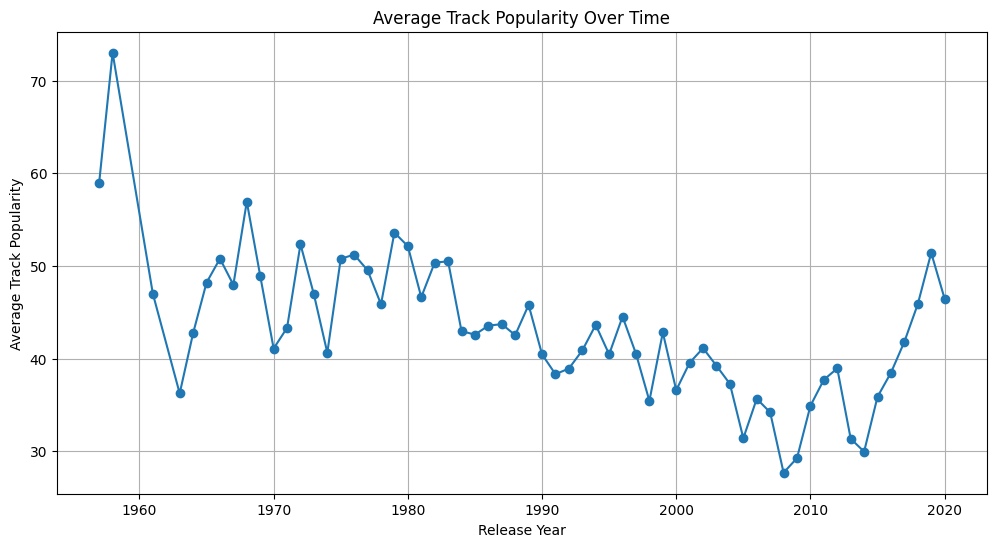

In [17]:
music['release_year'] = music['track_album_release_date'].dt.year

# Plotting track popularity over time
plt.figure(figsize=(12, 6))
plt.plot(music.groupby('release_year')['track_popularity'].mean(), marker='o')
plt.title('Average Track Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Track Popularity')
plt.grid(True)
plt.show()

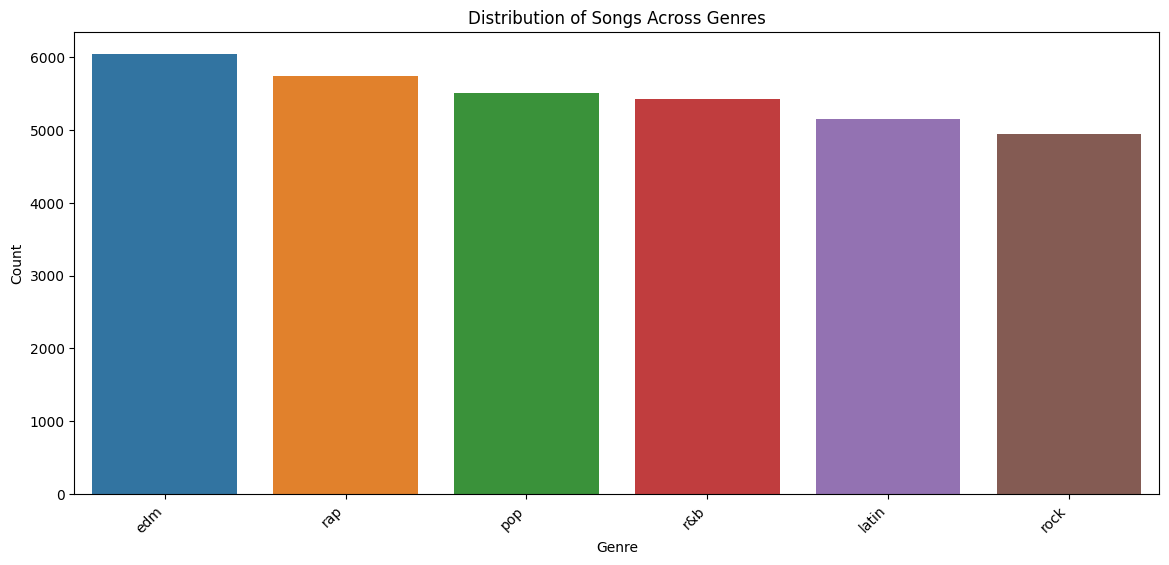

In [18]:
plt.figure(figsize=(14, 6))
sns.countplot(x='playlist_genre', data=music, order=music['playlist_genre'].value_counts().index)
plt.title('Distribution of Songs Across Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Analyzing average popularity, danceability, and energy for each genre
genre_avg = music.groupby('playlist_genre')[['track_popularity', 'danceability', 'energy']].mean()

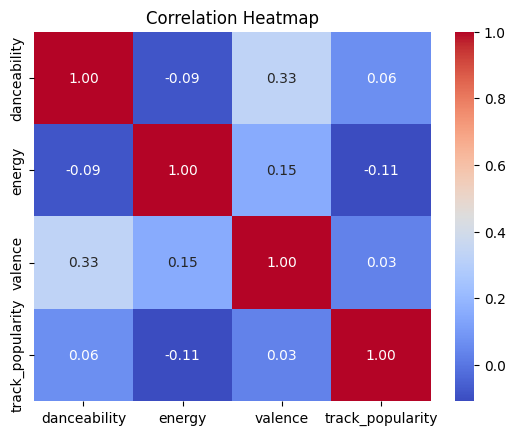

In [19]:
correlation_matrix = music[['danceability', 'energy', 'valence', 'track_popularity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

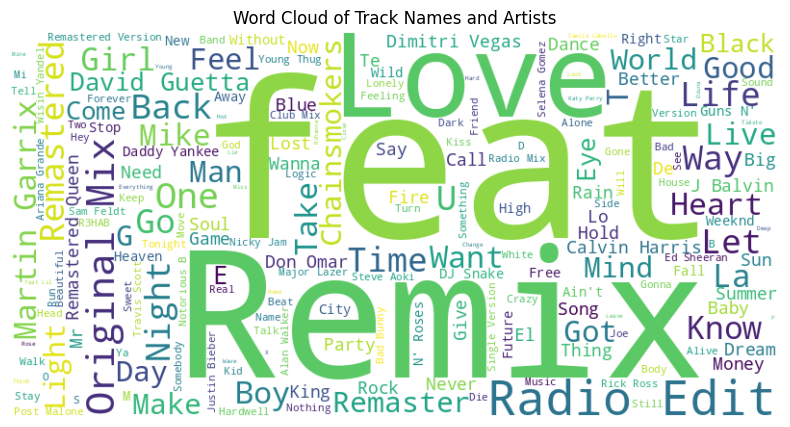

In [20]:
from wordcloud import WordCloud

# Assuming 'track_name' and 'track_artist' are text columns
text_data = ' '.join(music['track_name'] + ' ' + music['track_artist'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Track Names and Artists')
plt.show()

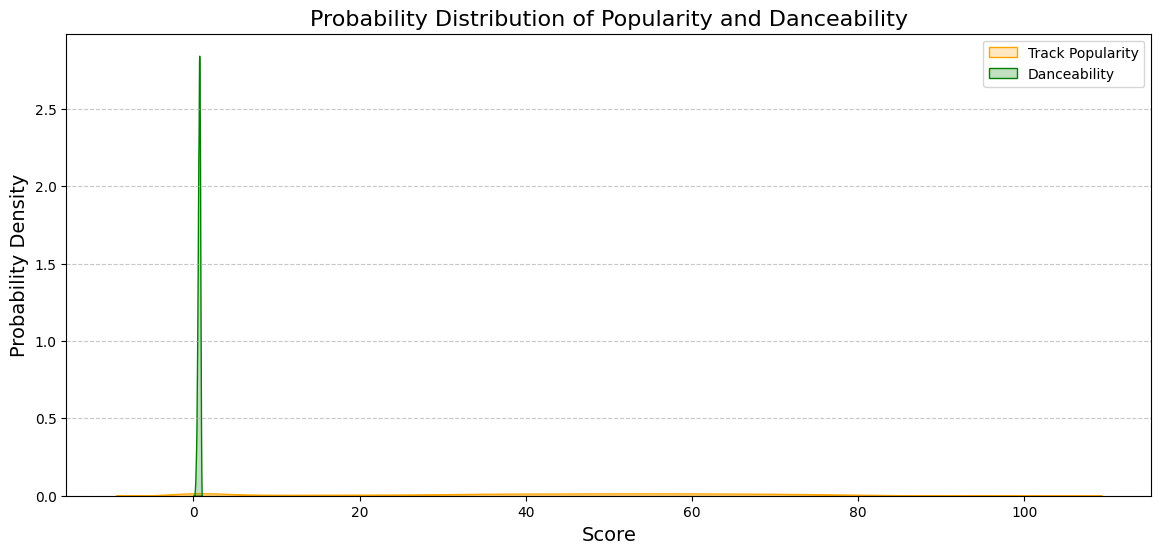

Probability of a song having high popularity (> 80): 4.08%

Correlation Matrix:
                  track_popularity  danceability    energy  loudness   valence
track_popularity          1.000000      0.064754 -0.108984  0.057717  0.033278
danceability              0.064754      1.000000 -0.086074  0.025351  0.330538
energy                   -0.108984     -0.086074  1.000000  0.676662  0.151050
loudness                  0.057717      0.025351  0.676662  1.000000  0.053411
valence                   0.033278      0.330538  0.151050  0.053411  1.000000

Statistical Summary of Key Variables:
       track_popularity  danceability        energy      loudness  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean          42.483551      0.654850      0.698603     -6.719529   
std           24.980476      0.145092      0.180916      2.988641   
min            0.000000      0.000000      0.000175    -46.448000   
25%           24.000000      0.563000      0.581000     -8.171

In [22]:
import scipy.stats as stats

# Probability distribution and visualization
plt.figure(figsize=(14, 6))
sns.kdeplot(music['track_popularity'], fill=True, color='orange', label='Track Popularity')
sns.kdeplot(music['danceability'], fill=True, color='green', label='Danceability')
plt.title('Probability Distribution of Popularity and Danceability', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Probability of a song having high popularity (popularity > 80)
high_popularity_prob = len(music[music['track_popularity'] > 80]) / len(music)
print(f"Probability of a song having high popularity (> 80): {high_popularity_prob:.2%}")

# Correlations between numerical variables
correlation_matrix = music[['track_popularity', 'danceability', 'energy', 'loudness', 'valence']].corr()

# Statistical summary of key variables
numerical_summary = music[['track_popularity', 'danceability', 'energy', 'loudness', 'valence']].describe()

# Print results
print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nStatistical Summary of Key Variables:")
print(numerical_summary)

# Statistical test (example: t-test between danceability and energy)
t_stat, p_value = stats.ttest_ind(music['danceability'], music['energy'])
print(f"\nT-test between Danceability and Energy:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

1. Danceability and valence have a positive correlation of 0.33, suggesting that songs with higher danceability tend to convey more positive emotions.
2. Probability of a song having high popularity (> 80) is 4.08%, indicating that only a small fraction of songs in the dataset achieve a popularity score above 80.

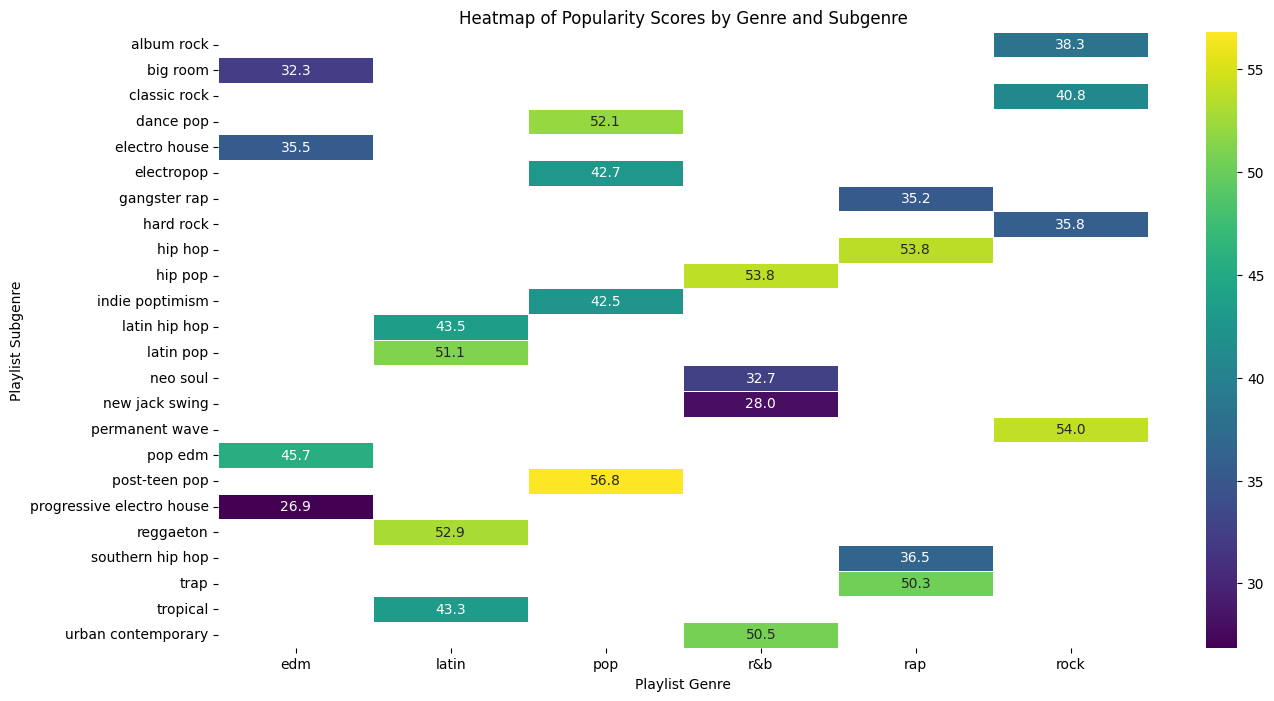

In [23]:
plt.figure(figsize=(15, 8))
heatmap_data = music.pivot_table(index='playlist_subgenre', columns='playlist_genre', values='track_popularity', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Popularity Scores by Genre and Subgenre')
plt.xlabel('Playlist Genre')
plt.ylabel('Playlist Subgenre')
plt.show()

In [25]:
import plotly.express as px

# Assuming your DataFrame is named music
fig = px.sunburst(
    music,
    path=['playlist_genre', 'playlist_subgenre'],
    color='track_popularity',
    labels={'track_popularity': 'Popularity'},
    color_continuous_scale='viridis'  # Set the color scale to viridis
)

fig.show()

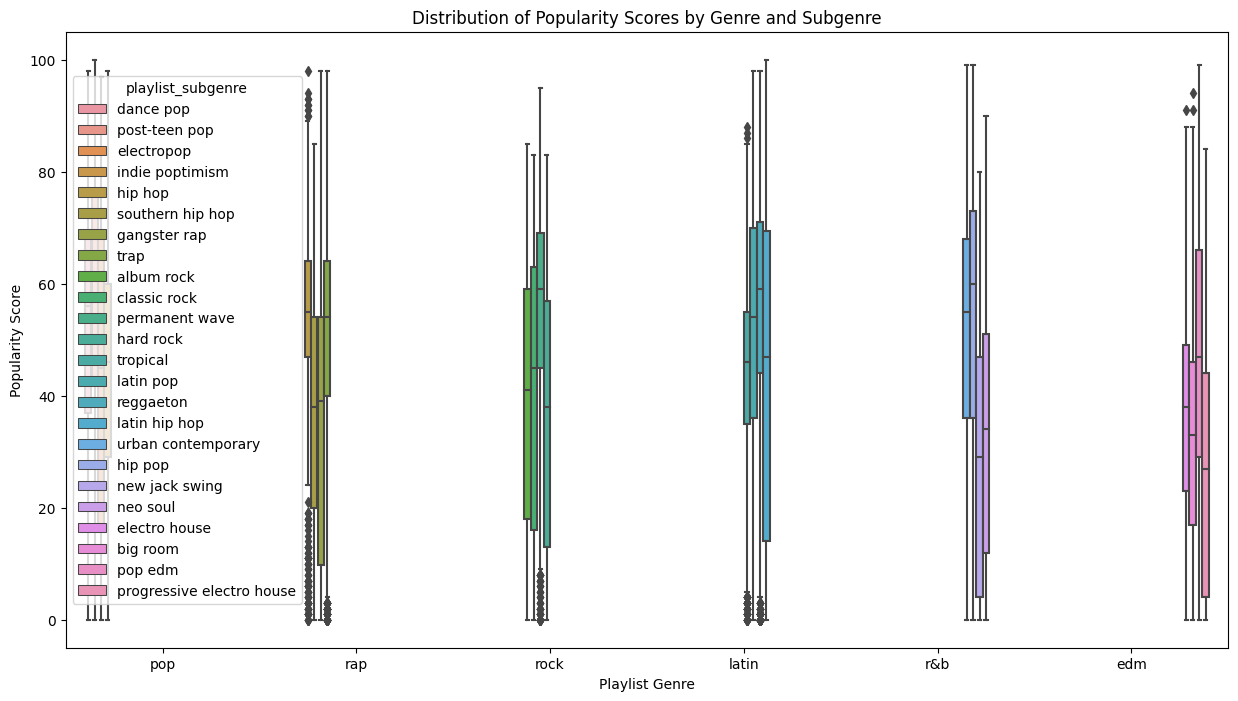

In [24]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='playlist_genre', y='track_popularity', data=music, hue='playlist_subgenre')
plt.title('Distribution of Popularity Scores by Genre and Subgenre')
plt.xlabel('Playlist Genre')
plt.ylabel('Popularity Score')
plt.show()